<a href="https://colab.research.google.com/github/Facundoheck/Python-challenge/blob/main/An%C3%A1lisis_de_votaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Script de análisis de votaciones**


## Registro de votaciones

In [1]:
!gdown 1aRF8Qk4UiNhUZBhW0r-nBHACBy6nlLuL

Downloading...
From: https://drive.google.com/uc?id=1aRF8Qk4UiNhUZBhW0r-nBHACBy6nlLuL
To: /content/election_data.csv
100% 12.2M/12.2M [00:00<00:00, 46.3MB/s]


In [3]:
import csv

#creo una funcion para transformar los datos de un csv en una lista
def toList(archivo):
    global lista
    with open(archivo,'r') as file:
        lectura=csv.reader(file)
        lista=[]
        for i in lectura:
            lista.append(i)
    return lista

In [4]:
#llamo a la funcion para pasar election_data.csv a lista
toList('election_data.csv')
#elimino el indice de la lista (Ballot ID,County,Candidate)
lista.pop(0)
#cantidad de registros en la lista
votos=len(lista)

print_total_votes=f"Total votes: {votos}"

In [5]:
#inicializo las listas de los votantes
Charles=[]
Diana=[]
Raymon=[]
Nulos=[]

#por cada voto, se suma un registro (Ballot ID,County,Candidate) a la lista
for i in lista:
    if i[2]=='Charles Casper Stockham':
        Charles.append(i)
    elif i[2]=='Diana DeGette':
        Diana.append(i)
    elif i[2]=='Raymon Anthony Doane':
        Raymon.append(i)
    else:
        Nulos.append(i)

#cantidad de votos de cada candidato y tambien los votos nulos o anulados
charles_votes=len(Charles)
diana_votes=len(Diana)
raymon_votes=len(Raymon)
nulos_votes=len(Nulos)

#funcion para definir el porcentaje de votos que obtuvo cada candidato
def Porcentajes(cant_votos):
    global percent
    total_percent=(cant_votos*100)/votos
    percent=round(total_percent,2)
    return percent

#porcentaje de votos que obtuvo cada candidato
percent_charles_votes=Porcentajes(charles_votes)
percent_diana_votes=Porcentajes(diana_votes)
percent_raymon_votes=Porcentajes(raymon_votes)
percent_nulos_votes=Porcentajes(nulos_votes)

print_charles_votes=f"Charles Casper Stockham: {percent_charles_votes}% ({charles_votes})"
print_diana_votes=f"Diana DeGette: {percent_diana_votes}% ({diana_votes})"
print_raymon_votes=f"Raymon Anthony Doane: {percent_raymon_votes}% ({raymon_votes})"
print_nulo_votes=f"Nulos: {percent_nulos_votes}% ({nulos_votes})"

In [6]:
#diccionario con los candidatos y los votos que obtuvo cada uno
candidatos_y_votos={
                        "Charles Casper Stockham":charles_votes,
                        "Diana DeGette":diana_votes,
                        "Raymon Anthony Doane":raymon_votes,
                        "Nulos":nulos_votes
                        }

#la mayor cantidad de votos
maximo_votos=max(candidatos_y_votos.values())

#el candidato que recibió la mayor cantidad de votos
candidato_ganador=list(candidatos_y_votos.keys())[list(candidatos_y_votos.values()).index(maximo_votos)]

print_candidato_ganador=f"Winner: {candidato_ganador}"

In [7]:
#abro el archivo en modo escritura, si no existe se crea uno automaticamente
with open('soluciones.txt','w') as soluciones:
    soluciones.write("Election results:" + "\n\n" + "-"*50 + "\n\n")
    soluciones.write(print_total_votes + "\n\n" + "-"*50 + "\n\n")
    soluciones.write(print_charles_votes + "\n\n" + print_diana_votes + "\n\n" + print_raymon_votes +"\n\n" + print_nulo_votes + "\n\n" + "-"*50 + "\n\n")
    soluciones.write(print_candidato_ganador + "\n\n" + "-"*50)

print("Resultado exportado al archivo 'soluciones.txt'")

Resultado exportado al archivo 'soluciones.txt'


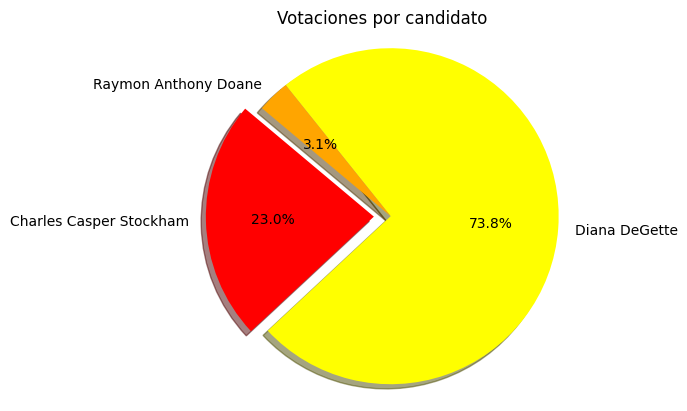

In [13]:
import matplotlib.pyplot as plt

# Datos para el gráfico de torta
labels = ['Charles Casper Stockham', 'Diana DeGette', 'Raymon Anthony Doane']
sizes = [percent_charles_votes, percent_diana_votes, percent_raymon_votes]  # Porcentajes o valores relativos de cada categoría
colors = ['red', 'yellow', 'orange', 'purple']
explode = (0.1, 0, 0)  # Separación de una porción del gráfico (opcional)

# Crear el gráfico de torta
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Hace que el gráfico de torta sea un círculo en lugar de una elipse

# Mostrar el gráfico
plt.title('Votaciones por candidato')
plt.show()
